# In-Depth: Decision Trees and Random Forests


# IMPORTS



In [1]:

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn import metrics
from sklearn import tree
#from dtreeviz.trees import dtreeviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Categorize Data

Shape of data:  (2658, 41)
Shape of labels:  (2641,)
0
507


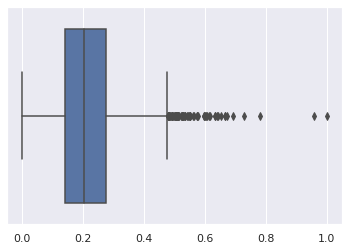

In [33]:


all_data = np.load('normalized_clean_data.npy')
data = all_data[:,:all_data.shape[1]-1]
print("Shape of data: ", data.shape)
oldlabels = all_data[:,-1]
labels4 = np.zeros(oldlabels.shape)
labels3 = np.zeros(oldlabels.shape)
labels2 = np.zeros(oldlabels.shape)
print("Shape of labels: ", labels.shape)
count = 0
tcount = 0
fcount = 0
for x in oldlabels:
  if x >= 0 and x < .1:
    labels4[count] = 0
  elif x >= 0.1 and x < 0.2:
    labels4[count] = 1
  elif x >= .2 and x < 0.3:
    labels4[count] = 2
  else:
    labels4[count] = 3
    fcount = fcount + 1
  count = count + 1
count = 0
for x in oldlabels:
  if x >= 0 and x < .15:
    labels3[count] = 0
  elif x >= 0.15 and x < 0.3:
    labels3[count] = 1
  else:
    labels3[count] = 2
  count = count + 1
count = 0
for x in oldlabels:
  if x >= 0 and x < .3:
    labels2[count] = 0
  else:
    labels2[count] = 1
  count = count + 1

all_titles = np.genfromtxt('clean_data_only_title.csv', delimiter=',', dtype='str')
titles = all_titles[:all_titles.shape[0]-1]
print(tcount)
print(fcount)
sns.boxplot(x=oldlabels)


# Visualizing One Decision Tree

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


KeyboardInterrupt: ignored

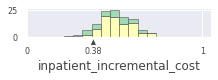

In [ ]:

tree = tree.DecisionTreeClassifier().fit(data, labels)

viz = dtreeviz(tree, data, labels,
                target_name="target",
                feature_names=titles, 
                class_names =["0", "1", "2", "3"])
viz
viz.save("decision_tree.svg")

# Bagging the Data

In [5]:


tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8,
                        random_state=1)

bag.fit(data, labels4)


BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


# Fitting Random Forest with Default Values

In [35]:


model = RandomForestClassifier(n_estimators=100, random_state=0)


In [34]:


Xtrain4, Xtest4, ytrain4, ytest4 = train_test_split(data, labels4,
                                                random_state=0)
Xtrain3, Xtest3, ytrain3, ytest3 = train_test_split(data, labels3,
                                                random_state=0)
Xtrain2, Xtest2, ytrain2, ytest2 = train_test_split(data, labels2,
                                                random_state=0)

model = RandomForestClassifier(n_estimators=10)


# Random Forest Evaluation

WITHOUT TUNING: 4 BINS
              precision    recall  f1-score   support

         0.0       0.34      0.50      0.41        48
         1.0       0.60      0.50      0.54       304
         2.0       0.41      0.39      0.40       223
         3.0       0.33      0.48      0.39        90

    accuracy                           0.46       665
   macro avg       0.42      0.47      0.44       665
weighted avg       0.48      0.46      0.47       665

WITHOUT TUNING: 3 BINS
              precision    recall  f1-score   support

         0.0       0.63      0.59      0.61       188
         1.0       0.71      0.65      0.68       396
         2.0       0.34      0.54      0.42        81

    accuracy                           0.62       665
   macro avg       0.56      0.59      0.57       665
weighted avg       0.64      0.62      0.63       665

WITHOUT TUNING: 2 BINS
              precision    recall  f1-score   support

         0.0       0.96      0.83      0.89       617
      

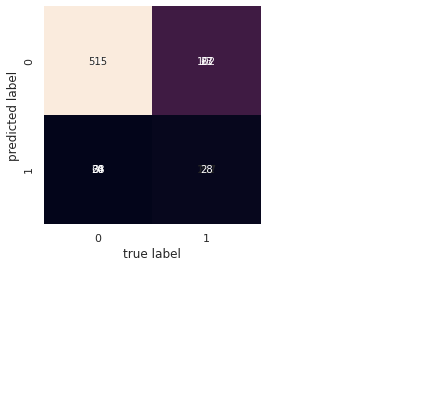

In [36]:
model = RandomForestClassifier(n_estimators=10)
print("WITHOUT TUNING: 4 BINS")
model.fit(Xtrain4, ytrain4)
ypred = model.predict(Xtest4)
print(metrics.classification_report(ypred, ytest4))
mat = confusion_matrix(ytest4, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

model = RandomForestClassifier(n_estimators=10)
print("WITHOUT TUNING: 3 BINS")
model.fit(Xtrain3, ytrain3)
ypred = model.predict(Xtest3)
print(metrics.classification_report(ypred, ytest3))
mat = confusion_matrix(ytest3, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

model = RandomForestClassifier(n_estimators=10)
print("WITHOUT TUNING: 2 BINS")
model.fit(Xtrain2, ytrain2)
ypred = model.predict(Xtest2)
print(metrics.classification_report(ypred, ytest2))
mat = confusion_matrix(ytest2, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

# Visualizing Feature Importance

In [ ]:
# Get numerical feature importances
importances = list(model.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(titles, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]


Variable: Cardiac Rehabilitation Eligibility Importance: 0.05
Variable: LesiureTimePhysicalActivity Importance: 0.05
Variable: no_college           Importance: 0.05
Variable: home_val             Importance: 0.05
Variable: prev_hd              Importance: 0.05
Variable: medicaid             Importance: 0.04
Variable: income               Importance: 0.04
Variable: Health_insurance     Importance: 0.03
Variable: perc_black           Importance: 0.03
Variable: perc_white           Importance: 0.03
Variable: perc_65up            Importance: 0.03
Variable: foodstmp             Importance: 0.03
Variable: povpct               Importance: 0.03
Variable: unemploy             Importance: 0.03
Variable: outpatient_incremental_cost Importance: 0.03
Variable: cholestrol_all       Importance: 0.02
Variable: Diuretic only        Importance: 0.02
Variable: Renin-Angiotensin System only Importance: 0.02
Variable: pharm_count          Importance: 0.02
Variable: hospitals_count      Importance: 0.02
Var

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

# Evaluation

In [9]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    #mape = 100 * np.mean(errors / test_labels)
    #accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    #print('Accuracy = {:0.2f}%.'.format(accuracy))

# RandomizedSearchCV

In [30]:

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


In [31]:



rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)



In [12]:

rf_random.fit(Xtrain, ytrain)
rf_random.best_params_

best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, Xtest, ytest)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 16.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 29.7min finished


Model Performance
Average Error: 0.4297 degrees.


# RandomizedSearch Evaluation

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 14.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 27.1min finished


Model Performance
Average Error: 0.2211 degrees.
RANDOMIZED EVALUATION: BINS 4


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


              precision    recall  f1-score   support

         0.0       0.91      0.80      0.85       499
         1.0       0.56      0.72      0.63       166
         2.0       0.00      0.00      0.00         0

    accuracy                           0.78       665
   macro avg       0.49      0.51      0.49       665
weighted avg       0.82      0.78      0.80       665

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 13.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 25.3min finished


Model Performance
Average Error: 0.1293 degrees.
RANDOMIZED EVALUATION: BINS 3
              precision    recall  f1-score   support

         0.0       0.99      0.88      0.93       653
         1.0       0.09      0.67      0.16        12
         2.0       0.00      0.00      0.00         0

    accuracy                           0.87       665
   macro avg       0.36      0.51      0.36       665
weighted avg       0.98      0.87      0.92       665

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 20.0min finished


Model Performance
Average Error: 0.0150 degrees.
RANDOMIZED EVALUATION: BINS 2
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99       665
         1.0       0.00      0.00      0.00         0

    accuracy                           0.98       665
   macro avg       0.50      0.49      0.50       665
weighted avg       1.00      0.98      0.99       665



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


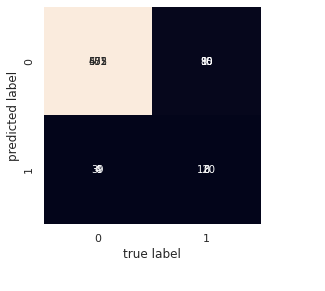

In [32]:
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(Xtrain4, ytrain4)
rf_random.best_params_
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, Xtest4, ytest4)
print("RANDOMIZED EVALUATION: BINS 4")
ypred = best_random.predict(Xtest4)
print(metrics.classification_report(ypred, ytest4))
mat = confusion_matrix(ytest4, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(Xtrain3, ytrain3)
rf_random.best_params_
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, Xtest3, ytest3)
print("RANDOMIZED EVALUATION: BINS 3")
ypred = best_random.predict(Xtest3)
print(metrics.classification_report(ypred, ytest3))
mat = confusion_matrix(ytest3, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(Xtrain2, ytrain2)
rf_random.best_params_
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, Xtest2, ytest2)
print("RANDOMIZED EVALUATION: BINS 2")
ypred = best_random.predict(Xtest2)
print(metrics.classification_report(ypred, ytest2))
mat = confusion_matrix(ytest2, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

# GridSearchCV

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   35.6s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed: 15.3min finished


{'bootstrap': True, 'max_depth': 100, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 1000}
GRID EVALUATION: 4 BINS
Model Performance
Average Error: 0.2286 degrees.


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


              precision    recall  f1-score   support

         0.0       0.92      0.79      0.85       510
         1.0       0.52      0.72      0.61       155
         2.0       0.00      0.00      0.00         0

    accuracy                           0.78       665
   macro avg       0.48      0.50      0.49       665
weighted avg       0.83      0.78      0.79       665

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   38.0s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed: 14.2min finished


{'bootstrap': True, 'max_depth': 80, 'max_features': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 200}
GRID EVALUATION: 3 BINS
Model Performance
Average Error: 0.1278 degrees.
              precision    recall  f1-score   support

         0.0       1.00      0.67      0.80       656
         1.0       0.03      0.78      0.06         9
         2.0       0.00      0.00      0.00         0

    accuracy                           0.67       665
   macro avg       0.34      0.48      0.29       665
weighted avg       0.99      0.67      0.79       665

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   28.0s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed: 12.0min finished


{'bootstrap': True, 'max_depth': 80, 'max_features': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 100}
GRID EVALUATION: 2 BINS
Model Performance
Average Error: 0.0150 degrees.
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99       665
         1.0       0.00      0.00      0.00         0

    accuracy                           0.98       665
   macro avg       0.50      0.49      0.50       665
weighted avg       1.00      0.98      0.99       665



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


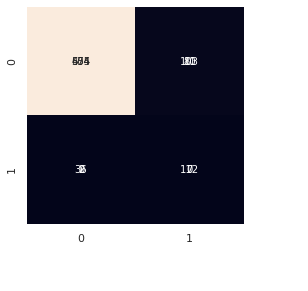

In [26]:

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(Xtrain4, ytrain4)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
print("GRID EVALUATION: 4 BINS")
grid_accuracy = evaluate(best_grid, Xtest4, ytest4)
ypred = best_grid.predict(Xtest4)
print(metrics.classification_report(ypred, ytest4))
mat = confusion_matrix(ytest4, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(Xtrain3, ytrain3)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
print("GRID EVALUATION: 3 BINS")
grid_accuracy = evaluate(best_grid, Xtest3, ytest3)
ypred = best_grid.predict(Xtest3)
print(metrics.classification_report(ypred, ytest4))
mat = confusion_matrix(ytest3, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(Xtrain2, ytrain2)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
print("GRID EVALUATION: 2 BINS")
grid_accuracy = evaluate(best_grid, Xtest2, ytest2)
ypred = best_grid.predict(Xtest2)
print(metrics.classification_report(ypred, ytest2))
mat = confusion_matrix(ytest2, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)


# GridSearch Evaluation

GRID EVALUATION
Model Performance
Average Error: 0.1815 degrees.
              precision    recall  f1-score   support

         0.0       0.97      0.84      0.90       623
         1.0       0.16      0.53      0.25        38

    accuracy                           0.82       661
   macro avg       0.57      0.68      0.57       661
weighted avg       0.92      0.82      0.86       661



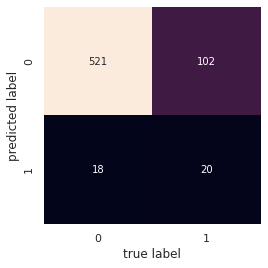

In [ ]:
print("GRID EVALUATION")
grid_accuracy = evaluate(best_grid, Xtest, ytest)
ypred = best_grid.predict(Xtest)
print(metrics.classification_report(ypred, ytest))
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');